## Importieren

In [3]:
### importiern von notwendigen Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks


In [4]:
### einlesen der Daten von Real 3 und VR 2

# data_real3 = pd.read_csv('data_test/2025-11-13-10-07_BA_Project_Real_3.csv', delimiter=';', skiprows = 3)
# data_vr2 = pd.read_csv('data_test/2025-11-13-10-26_BA_Project_VR_2.csv', delimiter=';', skiprows = 3)

participants = ['ID_1_Dabisch_Samuel', 'ID_2_Pohl_Jannis', 'ID_3_Kleber_Christian',
                'ID_4_Schröter_Till', 'ID_5_Zaschke_Lenard', 'ID_6_Petroll_Finn', 'ID_7_Gruber_Julius']
vornamen = ['Samuel', 'Jannis', 'Chris',
                'Till', 'Lenard', 'Finn', 'Julius']

number_of_participants = 3


df_real1 = pd.read_csv(f'data_final/{participants[number_of_participants]}/REAL_1_{vornamen[number_of_participants]}.csv', delimiter=';', skiprows = 3)
df_real2 = pd.read_csv(f'data_final/{participants[number_of_participants]}/REAL_2_{vornamen[number_of_participants]}.csv', delimiter=';', skiprows = 3)
df_vr1 = pd.read_csv(f'data_final/{participants[number_of_participants]}/VR_1_{vornamen[number_of_participants]}.csv', delimiter=';', skiprows = 3)
df_vr2 = pd.read_csv(f'data_final/{participants[number_of_participants]}/VR_2_{vornamen[number_of_participants]}.csv', delimiter=';', skiprows = 3)
df_mvc_beine = pd.read_csv(f'data_final/{participants[number_of_participants]}/MVC_Beine_{vornamen[number_of_participants]}.csv', delimiter=';', skiprows = 3)
df_MVC_Hals = pd.read_csv(f'data_final/{participants[number_of_participants]}/MVC_Hals_{vornamen[number_of_participants]}.csv', delimiter=';', skiprows = 3)


df_real1['time'] = df_real1['time'] - df_real1['time'][0]
df_real2['time'] = df_real2['time'] - df_real2['time'][0]
df_vr1['time'] = df_vr1['time'] - df_vr1['time'][0]
df_vr2['time'] = df_vr2['time'] - df_vr2['time'][0]
df_mvc_beine['time'] = df_mvc_beine['time'] - df_mvc_beine['time'][0]
df_MVC_Hals['time'] = df_MVC_Hals['time'] - df_MVC_Hals['time'][0]

C:\Users\tills\AppData\Local\Temp\ipykernel_2812\3583610214.py:14: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_real1 = pd.read_csv(f'data_final/{participants[number_of_participants]}/REAL_1_{vornamen[number_of_participants]}.csv', delimiter=';', skiprows = 3)
C:\Users\tills\AppData\Local\Temp\ipykernel_2812\3583610214.py:15: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_real2 = pd.read_csv(f'data_final/{participants[number_of_participants]}/REAL_2_{vornamen[number_of_participants]}.csv', delimiter=';', skiprows = 3)
C:\Users\tills\AppData\Local\Temp\ipykernel_2812\3583610214.py:16: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vr1 = pd.read_csv(f'data_final/{participants[number_of_participants]}/VR_1_{vornamen[number_of_participants]}.csv', delimiter=';', skiprows = 3)
C:\Users\tills\AppData\Local\Temp\i

Länge der Spalte RT Knee Flexion (deg) in Real 1: 118092, Länge der Zeit-Spalte: 118092
Länge der Spalte RT Knee Flexion (deg) in Real 2: 114768, Länge der Zeit-Spalte: 114768
Länge der Spalte RT Knee Flexion (deg) in VR 1: 102566, Länge der Zeit-Spalte: 102566
Länge der Spalte RT Knee Flexion (deg) in VR 2: 115932, Länge der Zeit-Spalte: 115932


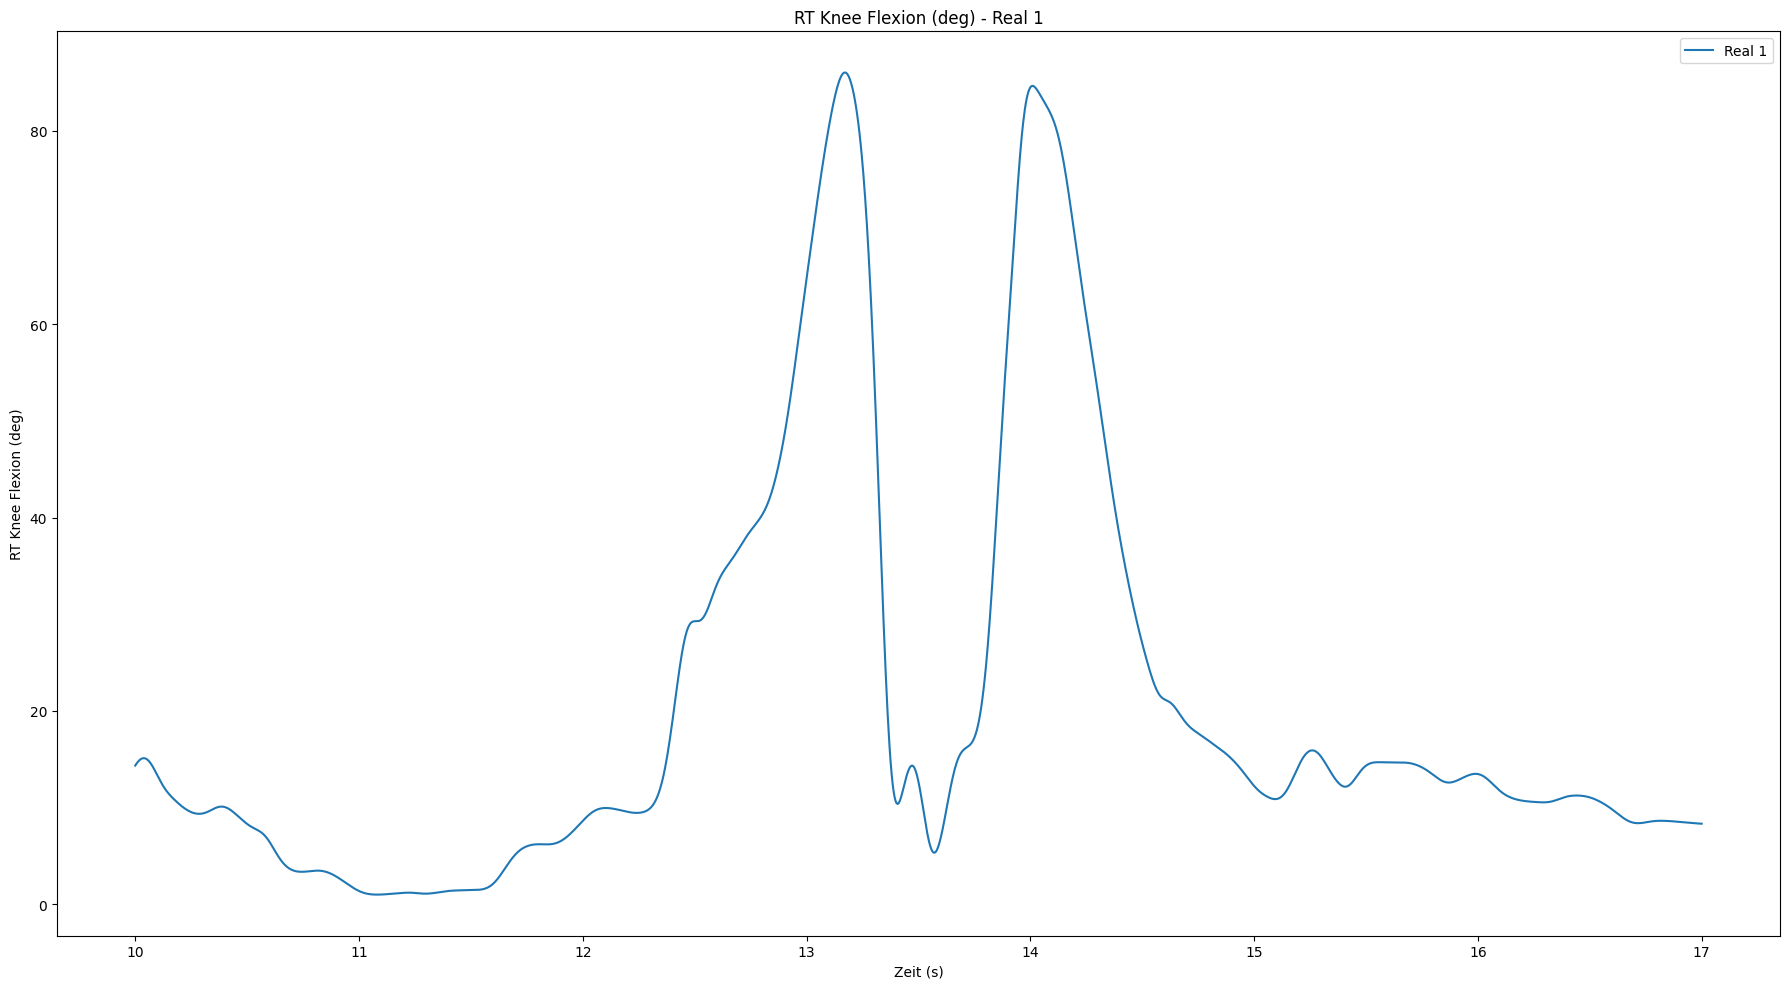

In [9]:
# Gesamtkraft berechnen
# (In deiner CSV heißen die Spalten laut Vorschau: 'lt force (n)' und 'rt force (n)')
df_real1['total_force'] = df_real1['LT Force (N)'] + df_real1['RT Force (N)']
df_real2['total_force'] = df_real2['LT Force (N)'] + df_real2['RT Force (N)']
df_vr1['total_force'] = df_vr1['LT Force (N)'] + df_vr1['RT Force (N)']
df_vr2['total_force'] = df_vr2['LT Force (N)'] + df_vr2['RT Force (N)']
df_mvc_beine['total_force'] = df_mvc_beine['LT Force (N)'] + df_mvc_beine['RT Force (N)']

# RT Hip Flexion (deg) LT Knee Flexion (deg)
Plot_feature = "RT Knee Flexion (deg)"

# printe die länge der spalte Plot_feature und time
print(f"Länge der Spalte {Plot_feature} in Real 1: {len(df_real1[Plot_feature])}, Länge der Zeit-Spalte: {len(df_real1['time'])}")
print(f"Länge der Spalte {Plot_feature} in Real 2: {len(df_real2[Plot_feature])}, Länge der Zeit-Spalte: {len(df_real2['time'])}")
print(f"Länge der Spalte {Plot_feature} in VR 1: {len(df_vr1[Plot_feature])}, Länge der Zeit-Spalte: {len(df_vr1['time'])}")
print(f"Länge der Spalte {Plot_feature} in VR 2: {len(df_vr2[Plot_feature])}, Länge der Zeit-Spalte: {len(df_vr2['time'])}")

# # Plotten der Gesamtkraft über die Zeit für alle sprünge in 5 subplots
# plt.figure(figsize=(12, 10))
# plt.subplot(3, 2, 1)
# plt.plot(df_real1['time'], df_real1[Plot_feature], label='Real 1')
# plt.xlabel('Zeit (s)')
# plt.ylabel(Plot_feature)
# plt.title(f'{Plot_feature} - Real 1')
# plt.subplot(3, 2, 2)
# plt.plot(df_real2['time'], df_real2[Plot_feature], label='Real 2', color='orange')
# plt.xlabel('Zeit (s)')
# plt.ylabel(Plot_feature)
# plt.title(f'{Plot_feature} - Real 2')
# plt.subplot(3, 2, 3)
# plt.plot(df_vr1['time'], df_vr1[Plot_feature], label='VR 1', color='green')
# plt.xlabel('Zeit (s)')
# plt.ylabel(Plot_feature)
# plt.title(f'{Plot_feature} - VR 1')
# plt.subplot(3, 2, 4)
# plt.plot(df_vr2['time'], df_vr2[Plot_feature], label='VR 2', color='red')
# plt.xlabel('Zeit (s)')
# plt.ylabel(Plot_feature)
# plt.title(f'{Plot_feature} - VR 2')
# plt.subplot(3, 2, 5)
# plt.plot(df_mvc_beine['time'], df_mvc_beine[Plot_feature], label='MVC Beine', color='purple')
# plt.xlabel('Zeit (s)')
# plt.ylabel(Plot_feature)
# plt.title(f'{Plot_feature} - MVC Beine')
# plt.tight_layout()
# # speichern des Plots
# # plt.savefig(f'Pictures_Test/Gesamt_kraft_über_zeit/{participants[number_of_participants]}_gesamt_kraft_über_zeit.png')
# plt.show()


# extrahiere zwiwshcne sekudne 10 und 20 sekunde
df_real1_segment = df_real1[(df_real1['time'] >= 10) & (df_real1['time'] <= 17)]

plt.close()
# Ende des Codes
#neuer einzelner plot
plt.figure(figsize=(18, 10))
plt.plot(df_real1_segment['time'], df_real1_segment[Plot_feature], label='Real 1')
plt.xlabel('Zeit (s)')
plt.ylabel(Plot_feature)
plt.title(f'{Plot_feature} - Real 1')
plt.legend()
plt.tight_layout()
# plt.savefig(f'Pictures_Test/Gesamt_kraft_über_zeit/{participants[number_of_participants]}_Real_1_{Plot_feature}_über_zeit.png')
plt.show()  




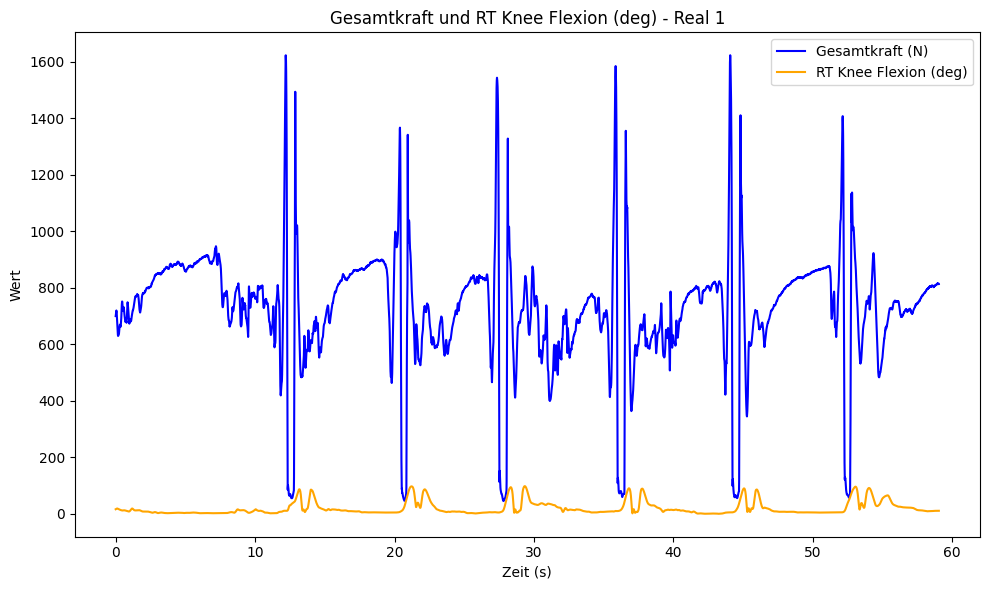

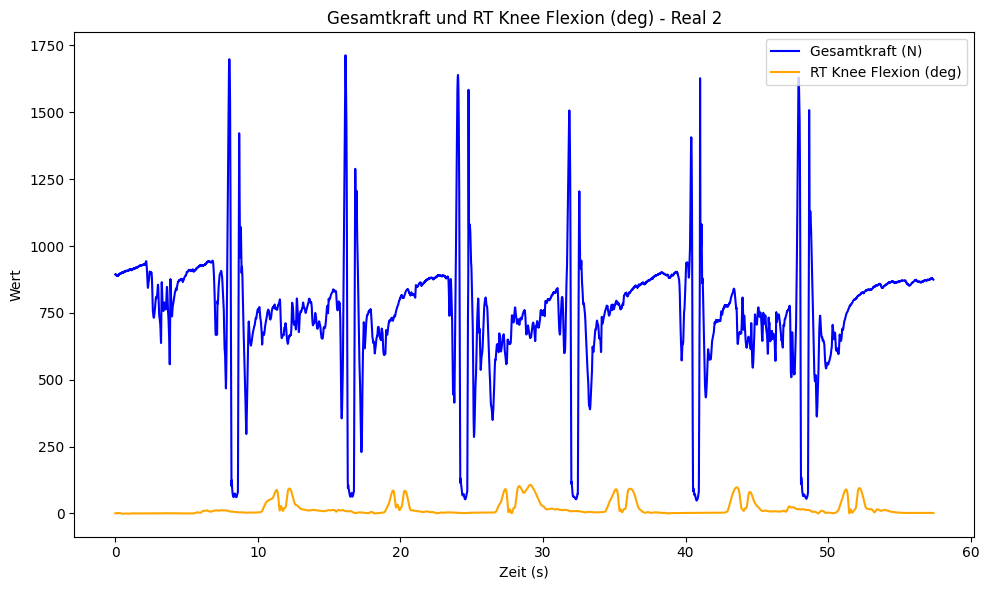

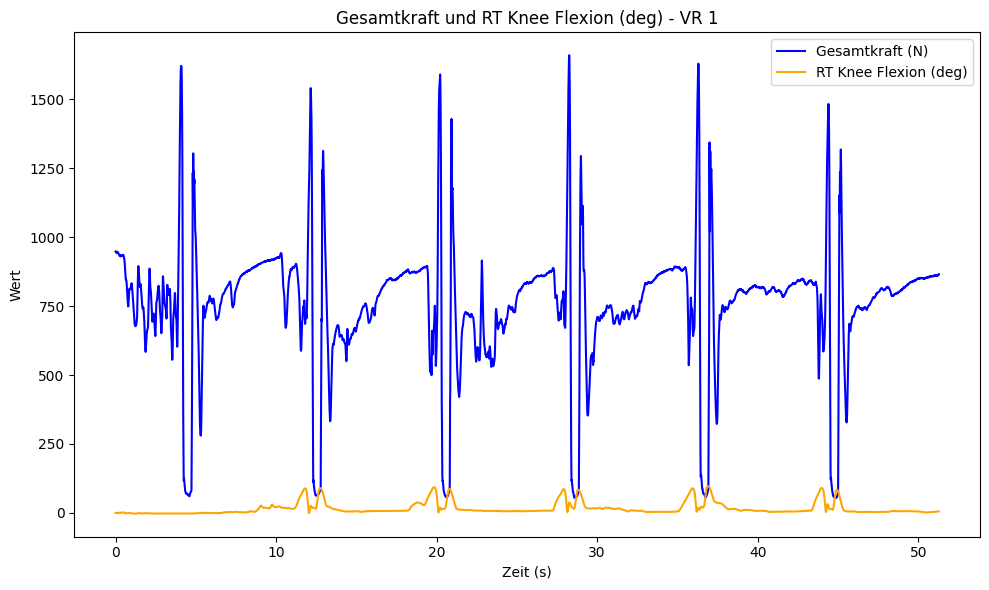

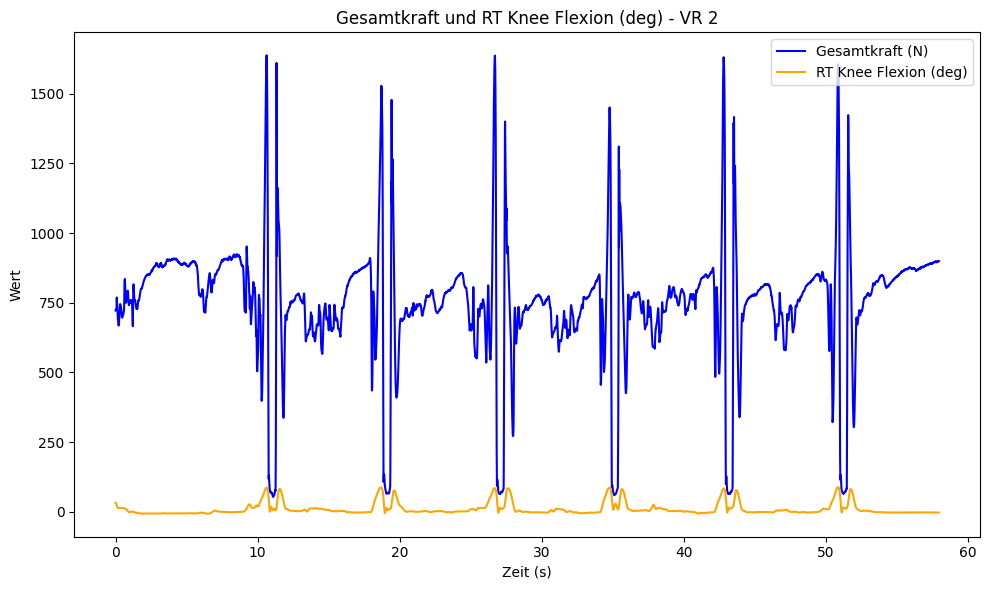

In [27]:
# plot von force_gesamt und RT Knee Flexion (deg) in einem plot für Real 1
plt.figure(figsize=(10, 6))
plt.plot(df_real1['time'], df_real1['total_force'], label='Gesamtkraft (N)', color='blue')
plt.plot(df_real1['time'], df_real1[Plot_feature], label=Plot_feature, color='orange')
plt.xlabel('Zeit (s)')
plt.ylabel('Wert')
plt.title(f'Gesamtkraft und {Plot_feature} - Real 1')
plt.legend()
plt.tight_layout()
# real 2
plt.figure(figsize=(10, 6))
plt.plot(df_real2['time'], df_real2['total_force'], label='Gesamtkraft (N)', color='blue')
plt.plot(df_real2['time'], df_real2[Plot_feature], label=Plot_feature, color='orange')
plt.xlabel('Zeit (s)')
plt.ylabel('Wert')
plt.title(f'Gesamtkraft und {Plot_feature} - Real 2')
plt.legend()
plt.tight_layout()

# vr 1
plt.figure(figsize=(10, 6))
plt.plot(df_vr1['time'], df_vr1['total_force'], label='Gesamtkraft (N)', color='blue')
plt.plot(df_vr1['time'], df_vr1[Plot_feature], label=Plot_feature, color='orange')
plt.xlabel('Zeit (s)')
plt.ylabel('Wert')
plt.title(f'Gesamtkraft und {Plot_feature} - VR 1')
plt.legend()
plt.tight_layout()
# vr 2
plt.figure(figsize=(10, 6))
plt.plot(df_vr2['time'], df_vr2['total_force'], label='Gesamtkraft (N)', color='blue')
plt.plot(df_vr2['time'], df_vr2[Plot_feature], label=Plot_feature, color='orange')
plt.xlabel('Zeit (s)')
plt.ylabel('Wert')
plt.title(f'Gesamtkraft und {Plot_feature} - VR 2')
plt.legend()
plt.tight_layout()

Gefundene Sprünge: 5


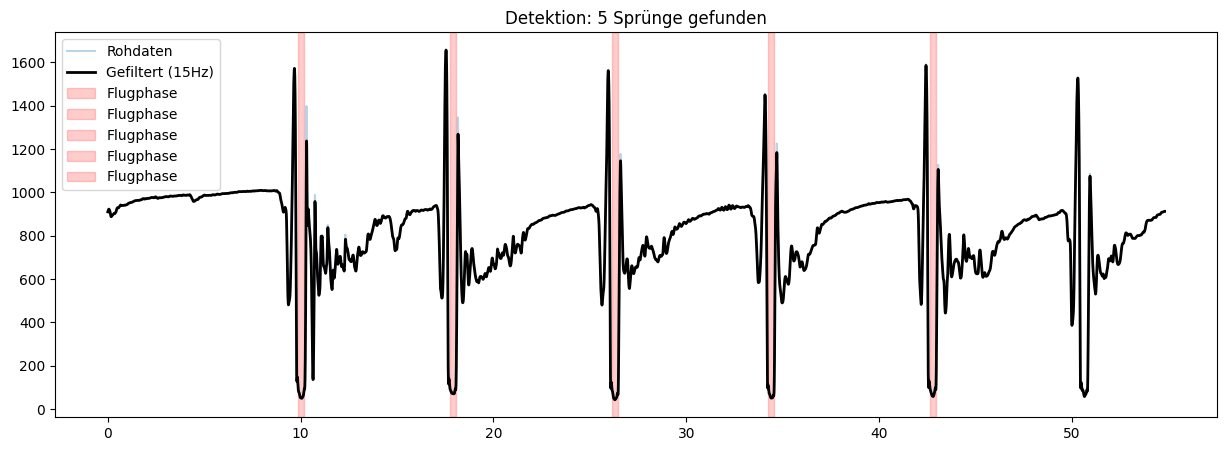

In [113]:
def lowpass_filter(data, cutoff=15, fs=2000, order=4):
    """Filtert das Kraftsignal, um Rauschen zu entfernen."""
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

def detect_jump_phases(df, fs=2000):
    """
    Optimierte Sprungerkennung mit Filterung und Prominence-Check.
    """
    # 1. Gesamtkraft berechnen
    raw_force = df['LT Force (N)'] + df['RT Force (N)']
    time = df['time'].values
    
    # 2. Filtern (15 Hz ist super für Körperbewegungen)
    filtered_force = lowpass_filter(raw_force, cutoff=15, fs=fs)
    
    # 3. Peak-Suche mit strengen Kriterien
    # height=1200: Muss mindestens 1200N erreichen
    # prominence=400: Muss sich deutlich von den Tälern abheben
    # distance: Mindestens 0.3s zwischen Peaks (Propulsion vs Landung)
    peaks, _ = find_peaks(filtered_force, 
                          height=1250, 
                          prominence=200, 
                          distance=int(0.2 * fs))
    
    jumps = []
    # 4. Flugphasen-Check (Suche nach der "Stille" zwischen den Peaks)
    # Wir schauen uns immer zwei aufeinanderfolgende Peaks an
    for i in range(len(peaks) - 1):
        p1, p2 = peaks[i], peaks[i+1]
        
        # Flugphase: Kraft im Original-Signal (nicht gefiltert!) muss fast 0 sein
        # Wir nehmen einen niedrigen Threshold für "echtes" Abheben
        flight_zone = raw_force[p1:p2]
        
        if np.any(flight_zone < 100): # Wenn zwischendurch < 30 Newton
            # Take-off: Letzter Punkt vor der Flugphase, der > 30N war
            # (Wir suchen von p1 aus vorwärts)
            takeoff_idx = p1 + np.where(raw_force[p1:p2] < 100)[0][0]
            
            # Landing: Erster Punkt nach der Flugphase, der wieder > 30N ist
            # (Wir suchen von p2 aus rückwärts)
            landing_idx = p1 + np.where(raw_force[p1:p2] < 100)[0][-1]
            
            jumps.append({
                'jump_nr': len(jumps) + 1,
                'takeoff_time': time[takeoff_idx],
                'landing_time': time[landing_idx],
                'flight_time': time[landing_idx] - time[takeoff_idx],
                'start_time': max(0, time[takeoff_idx] - 0.5), # Buffer für Analyse
                'end_time': min(time[-1], time[landing_idx] + 0.5)
            })
            
    return jumps, filtered_force


# funktion aufrufen
# jump_phases_real1 = detect_jump_phases(df_real1)
# jump_phases_real2 = detect_jump_phases(df_real2)
# jump_phases_vr1 = detect_jump_phases(df_vr1)
# jump_phases_vr2 = detect_jump_phases(df_vr2)
# jump_phases_mvc_beine = detect_jump_phases(df_mvc_beine)

# # im plot den absprung und die landung markieren
# plt.figure(figsize=(12, 6))
# plt.plot(df_real1['time'], df_real1['total_force'], label='Real 1')
# for jump in jump_phases_real1:
#     plt.axvline(x=jump['takeoff_time'], color='red', linestyle='--', label='Absprung' if jump['jump_nr'] == 1 else "")
#     plt.axvline(x=jump['landing_time'], color='green', linestyle='--', label='Landung' if jump['jump_nr'] == 1 else "")
# plt.xlabel('Zeit (s)')
# plt.ylabel('Gesamtkraft (N)')
# plt.title('Gesamtkraft über Zeit mit Sprungphasen - Real 1')
# plt.legend()
# plt.show()

# --- Anwendung im VS Code Block ---
# %% Sprünge detektieren
# fs (Samplingrate) bei Noraxon meist 2000Hz oder 1000Hz, bitte prüfen!
jumps, filtered_f = detect_jump_phases(df_real1, fs=2000)

print(f"Gefundene Sprünge: {len(jumps)}")

# Visualisierung zur Kontrolle
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(df_real1['time'], df_real1['LT Force (N)'] + df_real1['RT Force (N)'], alpha=0.3, label='Rohdaten')
plt.plot(df_real1['time'], filtered_f, label='Gefiltert (15Hz)', color='black', lw=2)

for j in jumps:
    plt.axvspan(j['takeoff_time'], j['landing_time'], color='red', alpha=0.2, label='Flugphase')

plt.title(f"Detektion: {len(jumps)} Sprünge gefunden")
plt.legend()
plt.show()

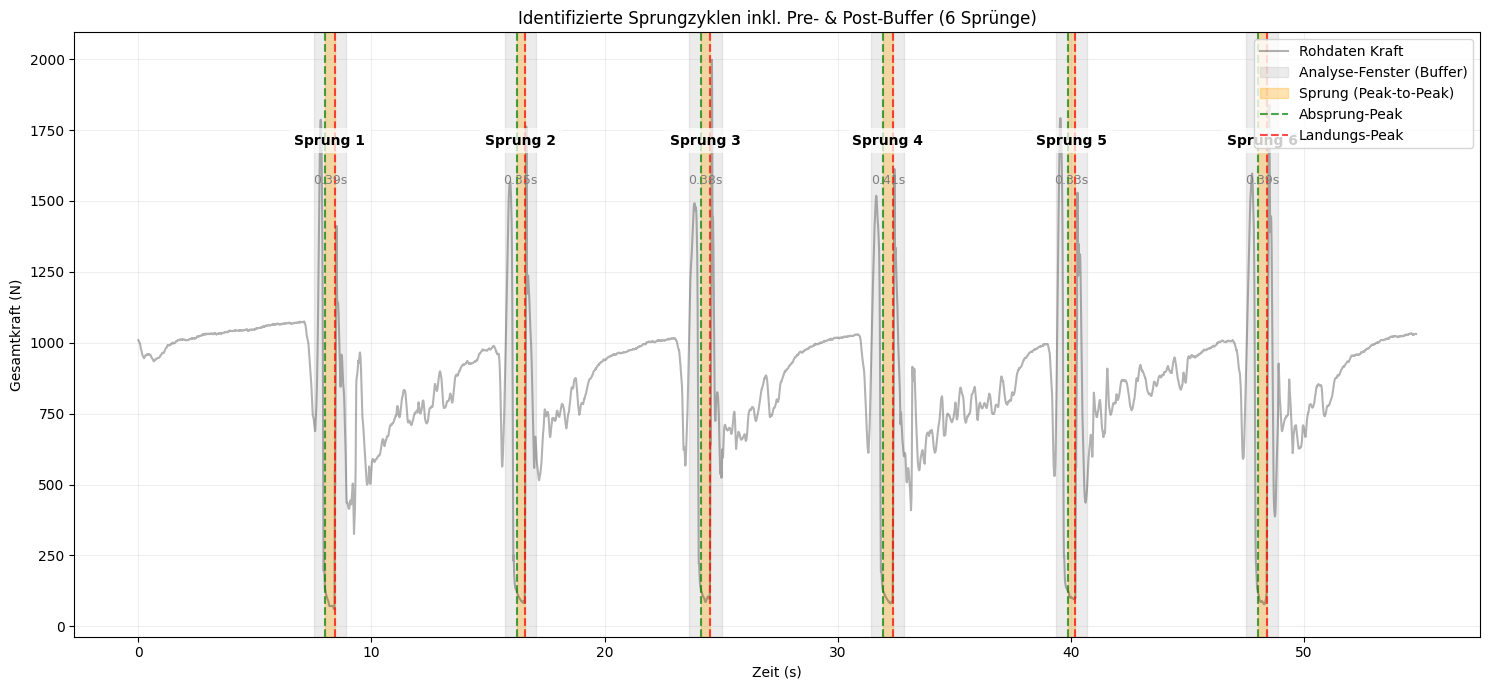

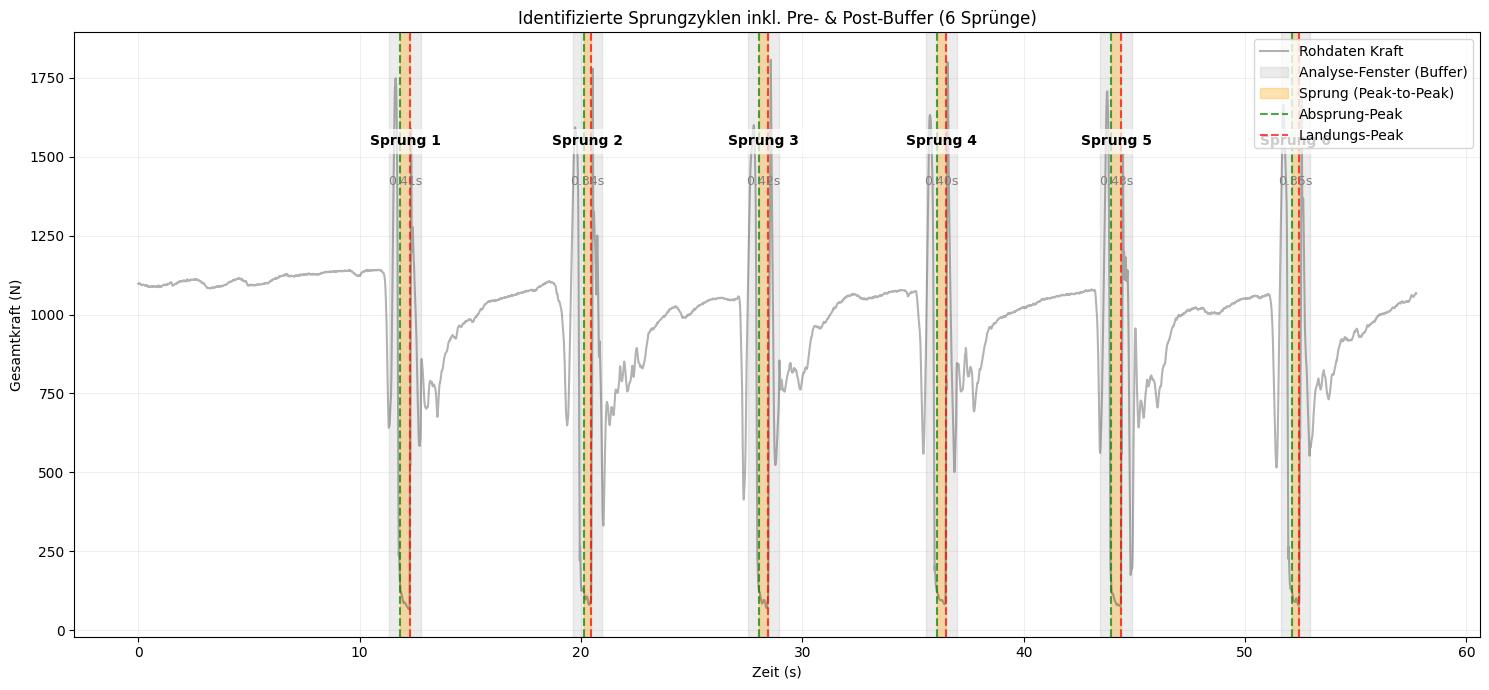

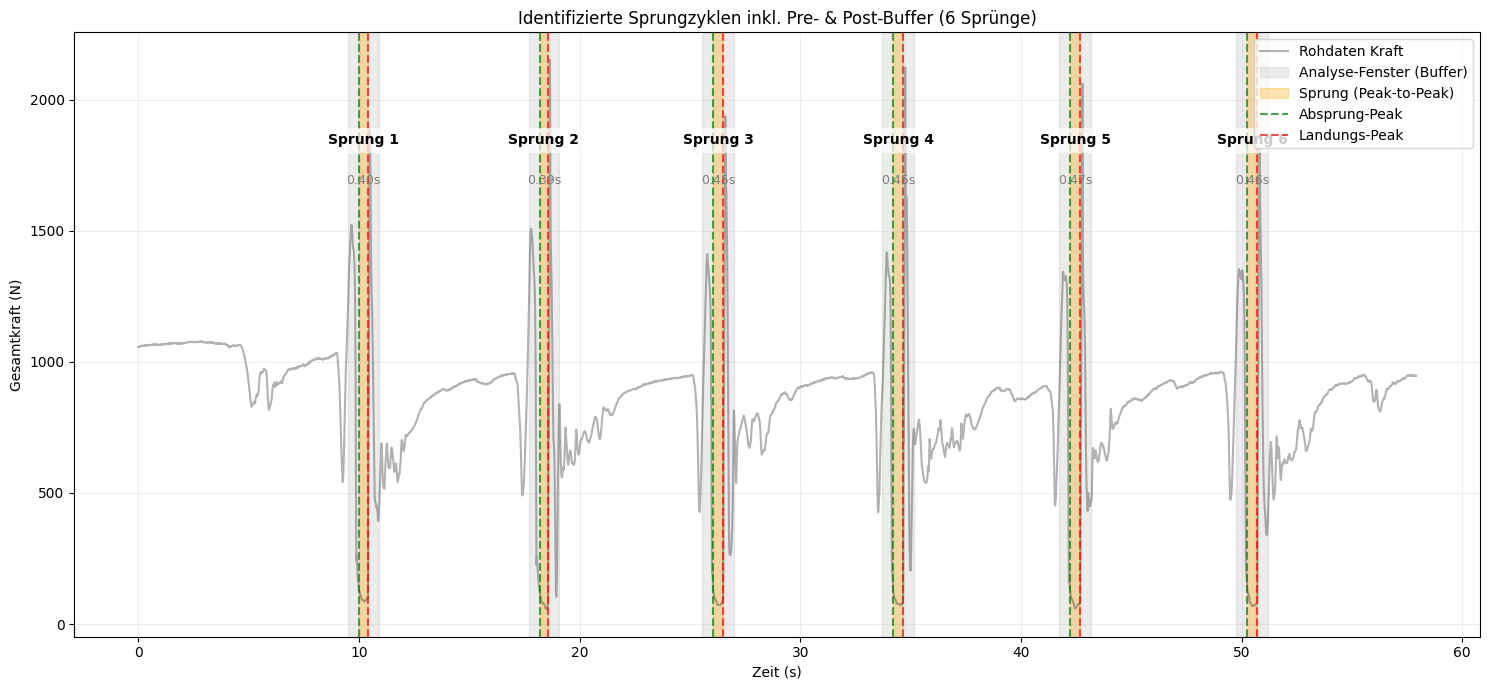

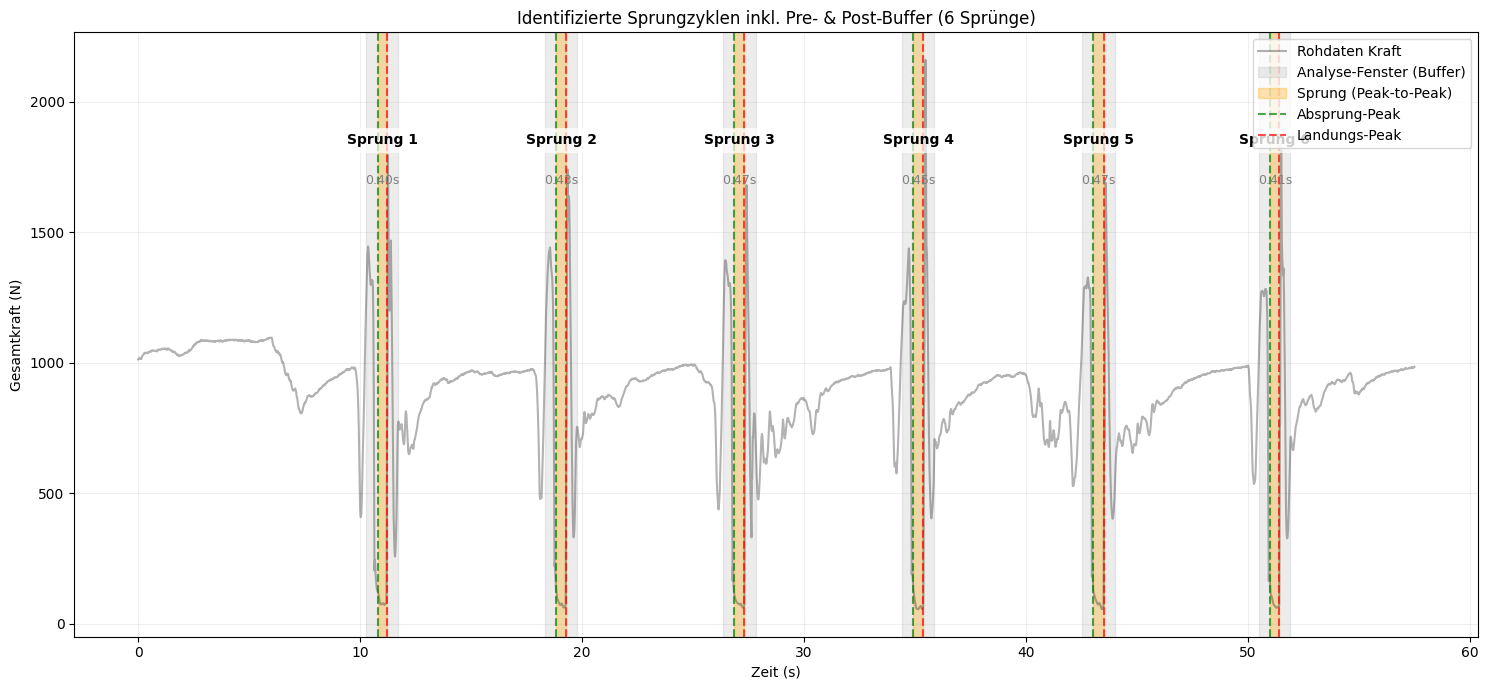

In [21]:
# %% Peak-Check Funktion
# import matplotlib.pyplot as plt
# from scipy.signal import find_peaks, butter, filtfilt

# def peaks(df, height=1250, distance_sec=0.2, fs=2000):

#     # total_force = df[force_cols].sum(axis=1)
#     total_force = df['LT Force (N)'] + df['RT Force (N)']
#     time = df['time'].values
    
#     # 2. Ganz leichter Filter nur für die Suche
#     nyq = 0.5 * fs
#     b, a = butter(4, 20 / nyq, btype='low')
#     filtered_f = filtfilt(b, a, total_force)

#     # 3. Peak Suche
#     # distance = Mindest-Abstand zwischen Peaks in Datenpunkten
#     peaks, properties = find_peaks(filtered_f, height=height, distance=int(distance_sec * fs))
    
#     return peaks

def identify_jumps(df, flight_threshold=50, min_flight_sec=0.2, fs=2000, buffer=0.75):
    """
    Identifiziert Sprünge rein über das Unterschreiten eines Kraft-Schwellenwerts.
    
    Parameters:
    -----------
    flight_threshold : float
        Kraftwert (N), unter dem eine Flugphase erkannt wird (Default: 50N).
    min_flight_sec : float
        Mindestdauer in der Luft, um als Sprung zu gelten (verhindert Fehltrigger).
    """
    total_force = (df['LT Force (N)'] + df['RT Force (N)']).values
    time = df['time'].values
    max_time = time[-1]
    
    # 1. Erstelle eine Maske: True wo wir "in der Luft" sind
    in_air = total_force < flight_threshold
    
    # 2. Finde die Zeitpunkte, an denen sich der Status ändert (0 auf 1 oder 1 auf 0)
    diff = np.diff(in_air.astype(int))
    takeoff_indices = np.where(diff == 1)[0]
    landing_indices = np.where(diff == -1)[0]
    
    # Sicherstellen, dass wir mit einem Take-off starten und einer Landung enden
    if len(takeoff_indices) > 0 and len(landing_indices) > 0:
        if landing_indices[0] < takeoff_indices[0]:
            landing_indices = landing_indices[1:]
        takeoff_indices = takeoff_indices[:len(landing_indices)]

    jumps_list = []
    
    # 3. Durch die gefundenen Phasen iterieren
    for i in range(len(takeoff_indices)):
        idx_off = takeoff_indices[i]
        idx_on = landing_indices[i]
        
        t_off = time[idx_off]
        t_on = time[idx_on]
        flug_dauer = t_on - t_off
        
        # Nur Sprünge nehmen, die eine plausible Flugzeit haben
        if flug_dauer > min_flight_sec:
            start_with_buffer = max(0, t_off - buffer)
            end_with_buffer = min(max_time, t_on + buffer)
            
            jump_dict = {
                'sprung nr.': len(jumps_list) + 1,
                'start_ana': round(start_with_buffer, 4),
                'end_ana': round(end_with_buffer, 4),
                'ana_dauer': round(end_with_buffer - start_with_buffer, 4),
                'peak_to_peak_dauer': round(flug_dauer, 4), # Hier: Echte Flugzeit
                't_absprung': round(t_off, 4),
                't_landung': round(t_on, 4)
            }
            jumps_list.append(jump_dict)
            
    return jumps_list

# %% Optimierte Visualisierung mit Buffer-Phasen
import matplotlib.pyplot as plt

def visualize_jumps(df, jumps_list):
    # Kraft berechnen
    total_force = df['LT Force (N)'] + df['RT Force (N)']
    time = df['time'].values
    
    plt.figure(figsize=(15, 7))
    plt.plot(time, total_force, color='black', alpha=0.3, label='Rohdaten Kraft')
    
    # Hilfsvariablen für die Legende (damit Labels nur 1x erscheinen)
    labeled_buffer = False
    labeled_jump_zone = False
    labeled_peaks = False
    
    for j in jumps_list:
        # 1. Den gesamten Analyse-Bereich (inkl. 0.5s Buffer) hinterlegen
        plt.axvspan(j['start_ana'], j['end_ana'], 
                    color='gray', alpha=0.15, 
                    label='Analyse-Fenster (Buffer)' if not labeled_buffer else "")
        labeled_buffer = True
        
        # 2. Den Bereich zwischen den Peaks (eigentlicher Sprung) markieren
        plt.axvspan(j['t_absprung'], j['t_landung'], 
                    color='orange', alpha=0.3, 
                    label='Sprung (Peak-to-Peak)' if not labeled_jump_zone else "")
        labeled_jump_zone = True
        
        # 3. Vertikale Linien für die exakten Peaks
        plt.axvline(j['t_absprung'], color='green', linestyle='--', alpha=0.7, 
                    label='Absprung-Peak' if not labeled_peaks else "")
        plt.axvline(j['t_landung'], color='red', linestyle='--', alpha=0.7, 
                    label='Landungs-Peak' if not labeled_peaks else "")
        labeled_peaks = True
        
        # 4. Sprungnummer über dem Sprung platzieren
        text_pos_x = j['t_absprung'] + (j['peak_to_peak_dauer'] / 2)
        plt.text(text_pos_x, max(total_force) * 0.85, f"Sprung {j['sprung nr.']}", 
                 horizontalalignment='center', fontweight='bold', 
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
        
        # 5. Dauer anzeigen
        plt.text(text_pos_x, max(total_force) * 0.78, f"{j['peak_to_peak_dauer']:.2f}s", 
                 horizontalalignment='center', fontsize=9, color='gray')

    plt.title(f"Identifizierte Sprungzyklen inkl. Pre- & Post-Buffer ({len(jumps_list)} Sprünge)")
    plt.xlabel("Zeit (s)")
    plt.ylabel("Gesamtkraft (N)")
    
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()

flight_threshold = 125  # Newton
# --- Aufruf ---
jumps_real_1 = identify_jumps(df_real1,flight_threshold, min_flight_sec=0.3, fs=2000, buffer=0.5)
jumps_real_2 = identify_jumps(df_real2,flight_threshold, min_flight_sec=0.3, fs=2000, buffer=0.5)
jumps_vr_1 = identify_jumps(df_vr1,flight_threshold, min_flight_sec=0.3, fs=2000, buffer=0.5)
jumps_vr_2 = identify_jumps(df_vr2,flight_threshold, min_flight_sec=0.3, fs=2000, buffer=0.5)

visualize_jumps(df_real1, jumps_real_1)
visualize_jumps(df_real2, jumps_real_2)
visualize_jumps(df_vr1, jumps_vr_1)
visualize_jumps(df_vr2, jumps_vr_2)

In [115]:
### Zeiten Nullen setzen
data_real3['time'] = data_real3['time'] - data_real3['time'][0]
data_vr2['time'] = data_vr2['time'] - data_vr2['time'][0]


NameError: name 'data_real3' is not defined

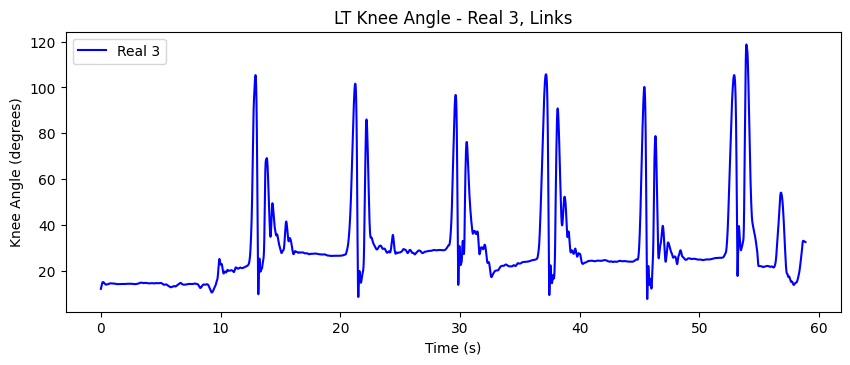

In [11]:
### Plotten des Knie winkel für Real 3 und VR 2 in zwei plots untereinader

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(data_real3['time'], data_real3['LT Knee Flexion (deg)'], label='Real 3', color='blue')
plt.title('LT Knee Angle - Real 3, Links')
plt.xlabel('Time (s)')
plt.ylabel('Knee Angle (degrees)')
plt.legend()
# plt.subplot(2, 1, 2)
# plt.plot(data_vr2['time'], data_vr2['LT Knee Flexion (deg)'], label='VR 2', color='orange')
# plt.title('Knee Angle - VR 2, Links')
# plt.xlabel('Time (s)')
# plt.ylabel('Knee Angle (degrees)')
# plt.legend()
# plt.tight_layout()
# plt.show()




In [5]:
### Importieren der Zyklendaten für Real 3 und VR 2

cycles = pd.read_csv('cycles_segments_summary.csv', delimiter=';')
print (cycles.head())

   t_start_s  t_end_s   Label  Cycle_ID  Duration_s
0     11.345   16.745  Real 3         1         5.4
1     19.686   25.087  Real 3         2         5.4
2     28.066   33.465  Real 3         3         5.4
3     35.647   41.047  Real 3         4         5.4
4     43.795   49.195  Real 3         5         5.4


In [6]:
# --------------------------
# A. Konfigurations-Einstellungen
# --------------------------

TIME_COL = "time"
N_POINTS = 101 # 0–100 % in 1%-Schritten

# --------------------------
# B. Hilfsfunktion zur Time-Normalisierung (leicht angepasst)
# --------------------------

def time_normalize_kinematics_segment(df, time_col, angle_col, t_start, t_end, n_points=N_POINTS):
    """
    Schneidet df zwischen t_start und t_end und interpoliert
    die Kinematik-Spalte auf n_points → 0–100 % Bewegungszyklus.
    
    Args:
        df (pd.DataFrame): Der gesamte (ge-nullete) Datensatz.
        time_col (str): Name der Zeitspalte.
        angle_col (str): Name der Winkelspalte, die normalisiert werden soll.
        t_start (float): Startzeit des Segments (s).
        t_end (float): Endzeit des Segments (s).
        n_points (int): Anzahl der Punkte für die Normalisierung.
        
    Returns:
        pd.DataFrame: DataFrame mit 'cycle_pct' und der normalisierten Winkelspalte.
    """
    
    # 1. Daten segmentieren
    mask = (df[time_col] >= t_start) & (df[time_col] <= t_end)
    seg = df.loc[mask].copy()

    if seg.shape[0] < 2:
        # Hier geben wir einen leeren DataFrame zurück, um Fehler zu vermeiden.
        return pd.DataFrame() 

    # 2. Zeitraster und Prozent-Vektor erstellen
    t_seg = seg[time_col].to_numpy()
    
    # Sicherstellen, dass die Interpolation funktioniert, indem wir Start und Ende exakt treffen
    t_target = np.linspace(t_seg.min(), t_seg.max(), n_points) 
    cycle_pct = np.linspace(0, 100, n_points)

    # 3. Interpolation
    out = pd.DataFrame({"cycle_pct": cycle_pct})
    y = seg[angle_col].to_numpy()
    
    # Überprüfen, ob das Segment gültige Daten enthält
    if np.isnan(y).all():
        raise ValueError(f"Segment {t_start:.3f}–{t_end:.3f} enthält nur NaN-Werte.")
        
    y_interp = np.interp(t_target, t_seg, y)
    out[angle_col] = y_interp

    return out


# --------------------------
# C. Hauptfunktionen zur Analyse und Visualisierung
# --------------------------

def normalize_kinematics_cycles(data_df, cycle_df, label, angle_col):
    """
    Normalisiert alle Zyklen für eine gegebene Bedingung und einen Winkel.
    
    Args:
        data_df (pd.DataFrame): Der gesamte Rohdatensatz (z.B. data_real3).
        cycle_df (pd.DataFrame): Die Zyklus-Tabelle (mit t_start_s, t_end_s).
        label (str): Der Label der Bedingung ("Real 3" oder "VR 2").
        angle_col (str): Name der Winkelspalte (z.B. "LT Knee Flexion (deg)").
        
    Returns:
        list: Eine Liste von DataFrames, wobei jedes DF ein normalisierter Zyklus ist.
    """
    print(f"\n--- Normalisiere '{angle_col}' für {label} ---")
    
    # Filtern der Zyklus-Tabelle für die aktuelle Bedingung
    segments = cycle_df[cycle_df['Label'] == label].itertuples(index=False)
    
    normalized_cycles = []
    
    for row in segments:
        try:
            cyc = time_normalize_kinematics_segment(
                data_df, 
                TIME_COL, 
                angle_col, 
                row.t_start_s, 
                row.t_end_s, 
                n_points=N_POINTS
            )
            if not cyc.empty:
                normalized_cycles.append(cyc)
        except ValueError as e:
            print(f"  WARNUNG: Zyklus bei {row.t_start_s:.3f}s übersprungen. Grund: {e}")
            
    print(f"  {len(normalized_cycles)} Zyklen erfolgreich normalisiert.")
    return normalized_cycles


def plot_all_cycles_comparison(real_cycles, vr_cycles, angle_col):
    """
    Plottet alle einzelnen Zyklen von Real und VR nebeneinander in einem Figure.
    
    Args:
        real_cycles (list): Liste von DataFrames der normalisierten Real-Zyklen.
        vr_cycles (list): Liste von DataFrames der normalisierten VR-Zyklen.
        angle_col (str): Name der Winkelspalte, die geplottet wird.
    """
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True) # 1 Zeile, 2 Spalten
    
    # Plot für Real-Zyklen (linker Subplot)
    ax_real = axes[0]
    if real_cycles:
        for i, cyc in enumerate(real_cycles, start=1):
            ax_real.plot(cyc["cycle_pct"], cyc[angle_col], 
                         color="blue", alpha=0.3, linewidth=1, 
                         label=f'Zyklus {i}' if i == 1 else "") # Nur einmal Label hinzufügen
        ax_real.set_title(f"Einzelne Zyklen: {angle_col} in Real")
        ax_real.set_ylabel(angle_col)
    else:
        ax_real.set_title(f"Keine Real-Zyklen für {angle_col} gefunden")
    
    ax_real.set_xlabel("Bewegungszyklus [%]")
    ax_real.grid(True, linestyle='--', alpha=0.5)
    # ax_real.legend() # Kann optional hinzugefügt werden, wenn Label gewünscht sind

    # Plot für VR-Zyklen (rechter Subplot)
    ax_vr = axes[1]
    if vr_cycles:
        for i, cyc in enumerate(vr_cycles, start=1):
            ax_vr.plot(cyc["cycle_pct"], cyc[angle_col], 
                       color="orange", alpha=0.3, linewidth=1, 
                       label=f'Zyklus {i}' if i == 1 else "") # Nur einmal Label hinzufügen
        ax_vr.set_title(f"Einzelne Zyklen: {angle_col} in VR")
    else:
        ax_vr.set_title(f"Keine VR-Zyklen für {angle_col} gefunden")
        
    ax_vr.set_xlabel("Bewegungszyklus [%]")
    ax_vr.grid(True, linestyle='--', alpha=0.5)
    # ax_vr.legend() # Kann optional hinzugefügt werden

    plt.suptitle(f"Vergleich der Einzelzyklen für {angle_col}", fontsize=16) # Ein Figure-Titel
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Platz für den Super-Titel schaffen
    plt.show()


def calculate_mean_std(cycles_list, angle_col):
    """Berechnet Mittelwert und Standardabweichung aus einer Liste normalisierter Zyklen."""
    if not cycles_list:
        return None, None
        
    # Kombiniere alle Zyklen zu einem DataFrame
    all_data = pd.concat([cyc[angle_col] for cyc in cycles_list], axis=1)
    
    # Berechne Mittelwert und Standardabweichung für jeden Zeitpunkt (Zeile)
    mean_curve = all_data.mean(axis=1)
    std_curve = all_data.std(axis=1)
    
    return mean_curve, std_curve


def plot_mean_std_comparison(real_cycles, vr_cycles, angle_col):
    """
    Berechnet und plottet Mittelwert und SD beider Bedingungen 
    (Real und VR) in einem gemeinsamen Diagramm.
    """
    
    # 1. Daten berechnen
    mean_real, std_real = calculate_mean_std(real_cycles, angle_col)
    mean_vr, std_vr = calculate_mean_std(vr_cycles, angle_col)
    
    # Prüfen, ob Daten vorhanden sind
    if mean_real is None and mean_vr is None:
        print("Keine Zyklen in beiden Bedingungen für den Vergleich vorhanden.")
        return

    plt.figure(figsize=(10, 6))
    
    # Die x-Achse ist der Prozentsatz des Zyklus (0-100)
    cycle_pct = np.linspace(0, 100, N_POINTS)

    # 2. Plot Real (Blau)
    if mean_real is not None:
        plt.fill_between(cycle_pct, 
                         mean_real - std_real, 
                         mean_real + std_real, 
                         color='blue', alpha=0.2, label='Real $\\pm$ 1 SD')
        plt.plot(cycle_pct, mean_real, color='blue', linewidth=2, label='Real Mittelwert')

    # 3. Plot VR (Orange)
    if mean_vr is not None:
        plt.fill_between(cycle_pct, 
                         mean_vr - std_vr, 
                         mean_vr + std_vr, 
                         color='orange', alpha=0.2, label='VR $\\pm$ 1 SD')
        plt.plot(cycle_pct, mean_vr, color='orange', linewidth=2, label='VR Mittelwert')

    plt.title(f"Vergleich: Mittelwert & Streuung von {angle_col}")
    plt.xlabel("Bewegungszyklus [%]")
    plt.ylabel(angle_col)
    plt.legend(loc='best')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

## Knie Flexion


--- Normalisiere 'RT Knee Flexion (deg)' für Real 3 ---
  6 Zyklen erfolgreich normalisiert.

--- Normalisiere 'RT Knee Flexion (deg)' für VR 2 ---
  9 Zyklen erfolgreich normalisiert.

--- Normalisiere 'LT Knee Flexion (deg)' für Real 3 ---
  6 Zyklen erfolgreich normalisiert.

--- Normalisiere 'LT Knee Flexion (deg)' für VR 2 ---
  9 Zyklen erfolgreich normalisiert.


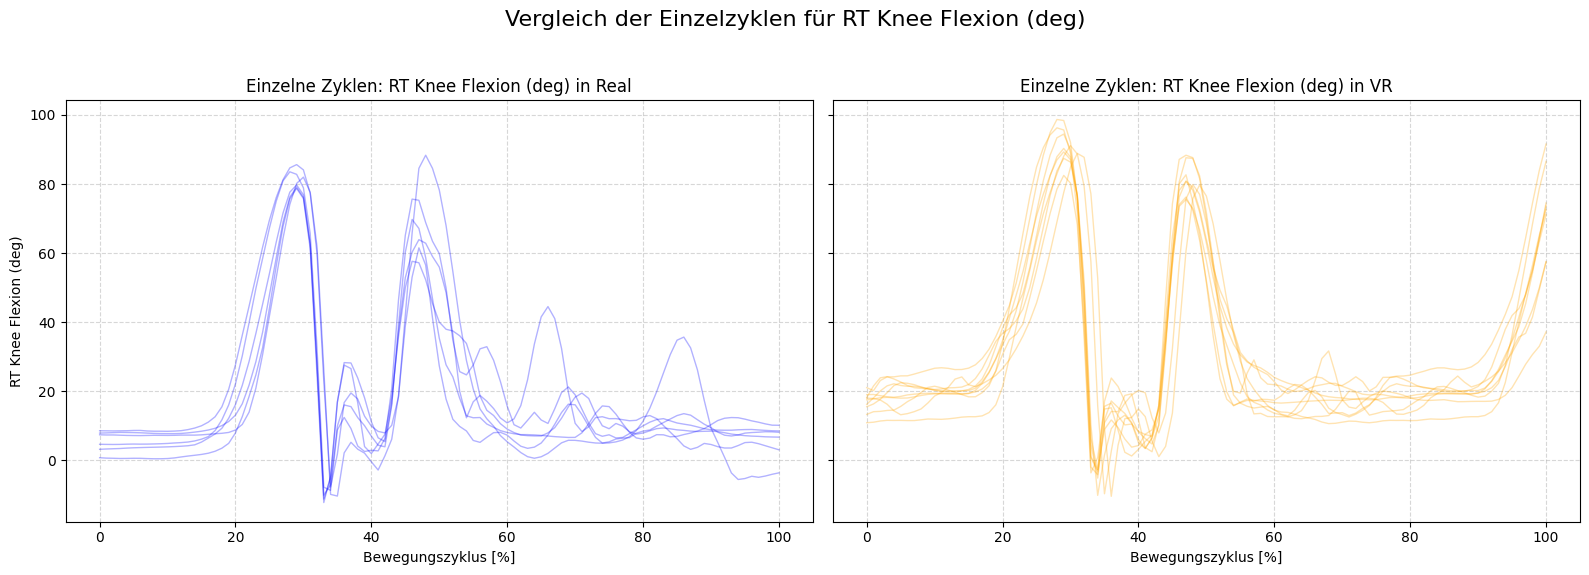

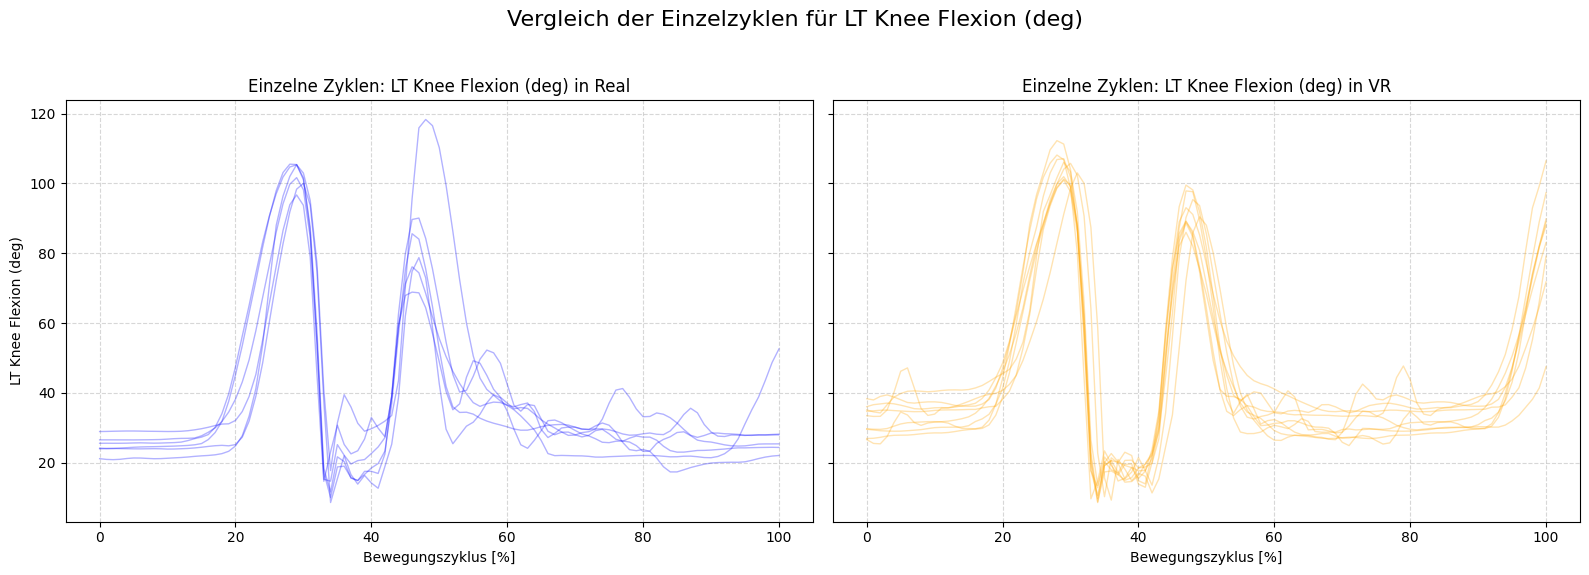

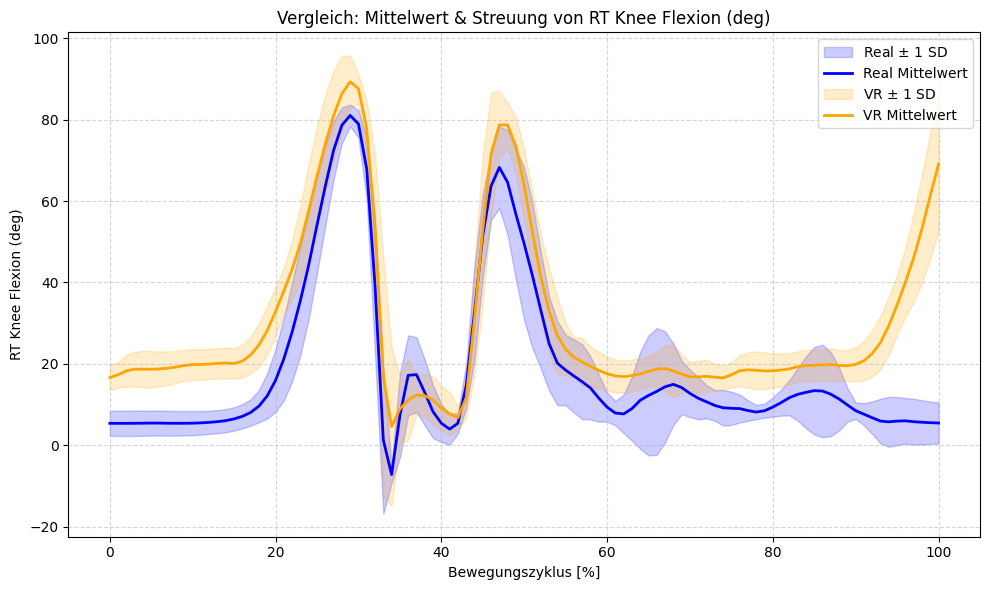

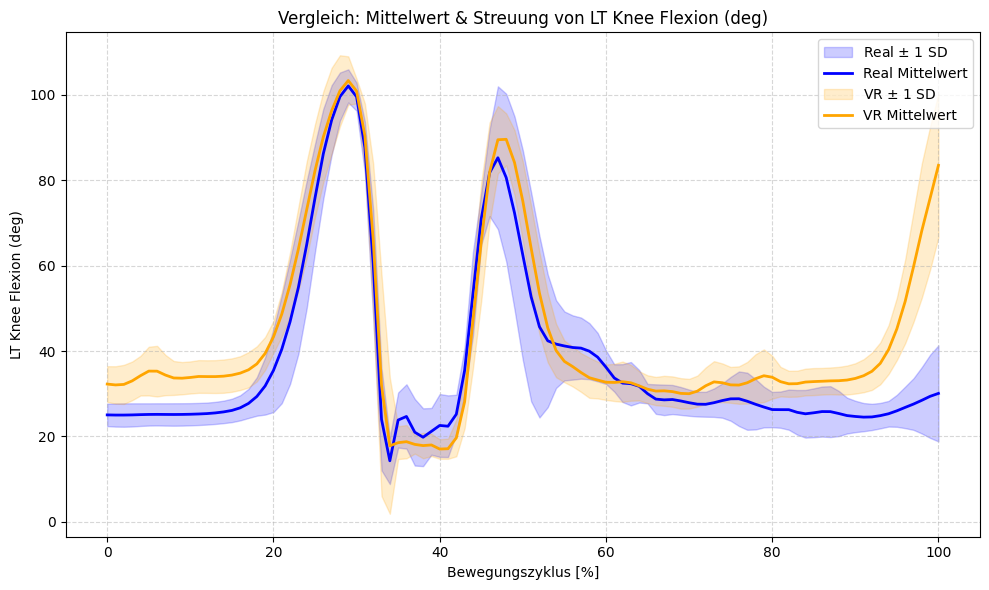

In [7]:
# 1. Normalisierung der Zyklen für beide Bedingungen (muss zuerst laufen!)
# Rechts Knie Flexion
real3_kin_cycles_right = normalize_kinematics_cycles(data_real3, cycles, "Real 3", "RT Knee Flexion (deg)")
vr2_kin_cycles_right = normalize_kinematics_cycles(data_vr2, cycles, "VR 2", "RT Knee Flexion (deg)")
# Links Knie Flexion
real3_kin_cycles_left = normalize_kinematics_cycles(data_real3, cycles, "Real 3", "LT Knee Flexion (deg)")
vr2_kin_cycles_left = normalize_kinematics_cycles(data_vr2, cycles, "VR 2", "LT Knee Flexion (deg)")


# 2. Visualisierung: Einzelne Zyklen nebeneinander (Der gewünschte Plot)
# print("\n--- Plotting Einzelzyklen Vergleich ---")
# HINWEIS: Hier müssen die Variablen real3_kin_cycles und vr2_kin_cycles
# aus dem Normalisierungsschritt gefüllt sein.
plot_all_cycles_comparison(real3_kin_cycles_right, vr2_kin_cycles_right, "RT Knee Flexion (deg)")
plot_all_cycles_comparison(real3_kin_cycles_left, vr2_kin_cycles_left, "LT Knee Flexion (deg)")


# 3. Visualisierung: Mittelwert & SD im Vergleich (Der gewünschte Plot)
# print("\n--- Plotting Mittelwert & SD Vergleich ---")
# HINWEIS: Hier müssen die Variablen real3_kin_cycles und vr2_kin_cycles
# aus dem Normalisierungsschritt gefüllt sein.
plot_mean_std_comparison(real3_kin_cycles_right, vr2_kin_cycles_right, "RT Knee Flexion (deg)")
plot_mean_std_comparison(real3_kin_cycles_left, vr2_kin_cycles_left, "LT Knee Flexion (deg)")

## Fußgelenk Dorsalextension


--- Normalisiere 'RT Ankle Dorsiflexion (deg)' für Real 3 ---
  6 Zyklen erfolgreich normalisiert.

--- Normalisiere 'RT Ankle Dorsiflexion (deg)' für VR 2 ---
  9 Zyklen erfolgreich normalisiert.

--- Normalisiere 'LT Ankle Dorsiflexion (deg)' für Real 3 ---
  6 Zyklen erfolgreich normalisiert.

--- Normalisiere 'LT Ankle Dorsiflexion (deg)' für VR 2 ---
  9 Zyklen erfolgreich normalisiert.


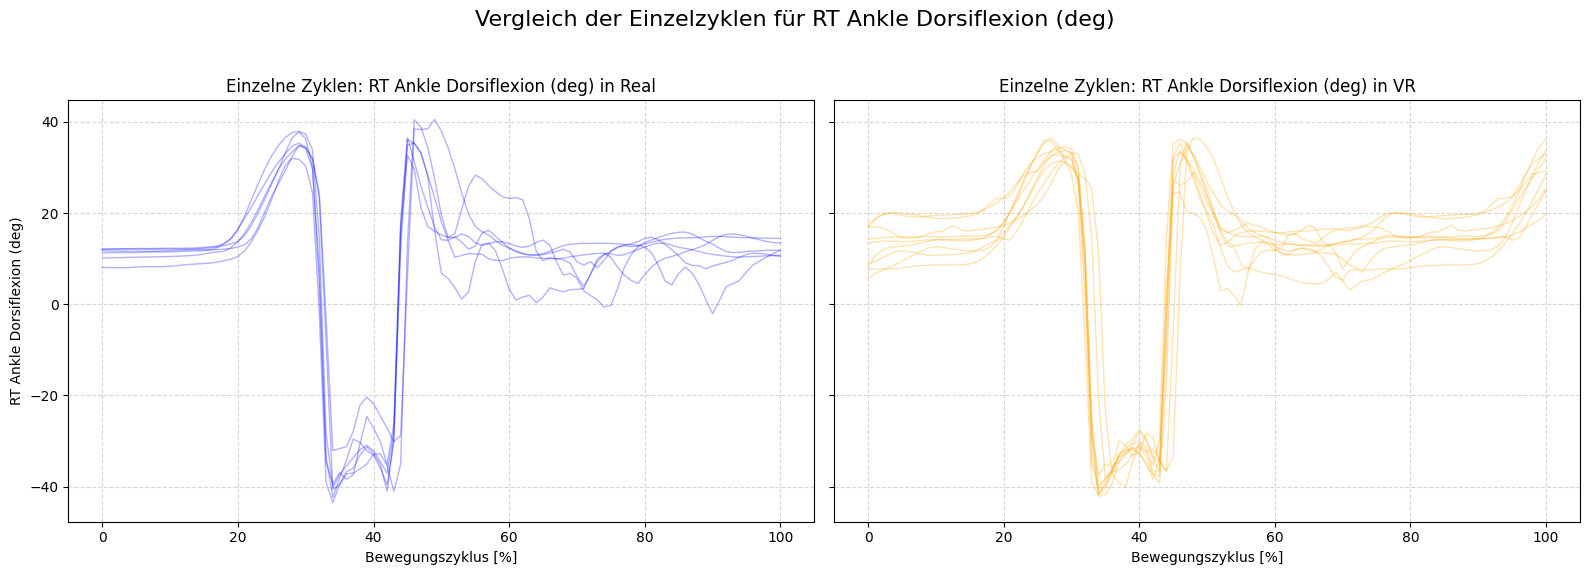

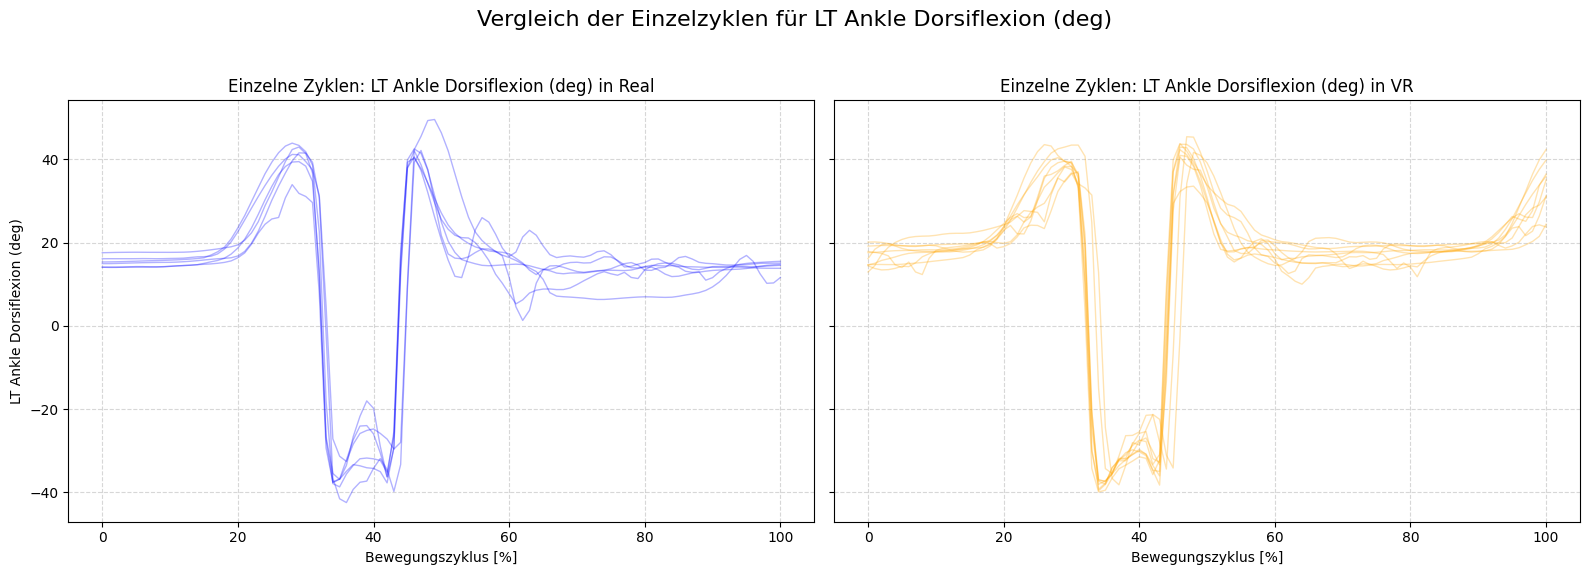

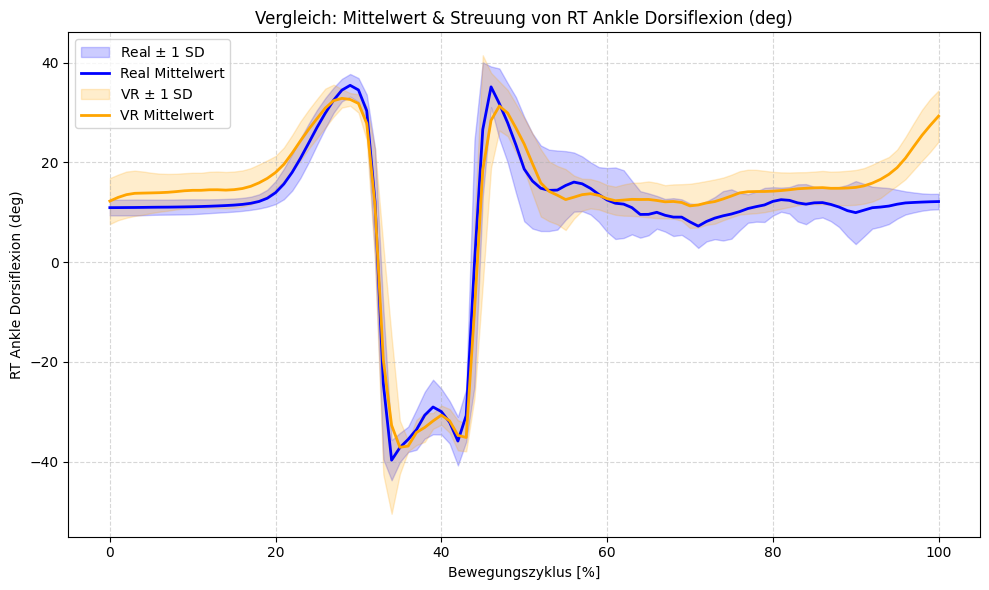

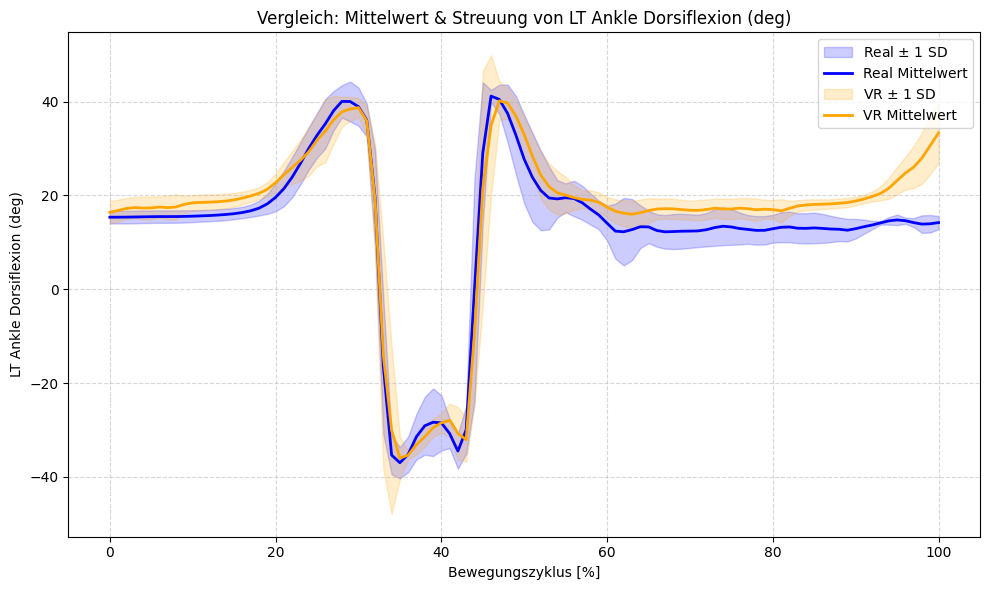

In [8]:
# 1. Normalisierung der Zyklen für beide Bedingungen (muss zuerst laufen!)
# Rechts Knie Flexion
real3_kin_cycles_right = normalize_kinematics_cycles(data_real3, cycles, "Real 3", "RT Ankle Dorsiflexion (deg)")
vr2_kin_cycles_right = normalize_kinematics_cycles(data_vr2, cycles, "VR 2", "RT Ankle Dorsiflexion (deg)")
# Links Knie Flexion
real3_kin_cycles_left = normalize_kinematics_cycles(data_real3, cycles, "Real 3", "LT Ankle Dorsiflexion (deg)")
vr2_kin_cycles_left = normalize_kinematics_cycles(data_vr2, cycles, "VR 2", "LT Ankle Dorsiflexion (deg)")


# 2. Visualisierung: Einzelne Zyklen nebeneinander (Der gewünschte Plot)
# print("\n--- Plotting Einzelzyklen Vergleich ---")
# HINWEIS: Hier müssen die Variablen real3_kin_cycles und vr2_kin_cycles
# aus dem Normalisierungsschritt gefüllt sein.
plot_all_cycles_comparison(real3_kin_cycles_right, vr2_kin_cycles_right, "RT Ankle Dorsiflexion (deg)")
plot_all_cycles_comparison(real3_kin_cycles_left, vr2_kin_cycles_left, "LT Ankle Dorsiflexion (deg)")


# 3. Visualisierung: Mittelwert & SD im Vergleich (Der gewünschte Plot)
# print("\n--- Plotting Mittelwert & SD Vergleich ---")
# HINWEIS: Hier müssen die Variablen real3_kin_cycles und vr2_kin_cycles
# aus dem Normalisierungsschritt gefüllt sein.
plot_mean_std_comparison(real3_kin_cycles_right, vr2_kin_cycles_right, "RT Ankle Dorsiflexion (deg)")
plot_mean_std_comparison(real3_kin_cycles_left, vr2_kin_cycles_left, "LT Ankle Dorsiflexion (deg)")

## Hüft Flexion


--- Normalisiere 'RT Hip Flexion (deg)' für Real 3 ---
  6 Zyklen erfolgreich normalisiert.

--- Normalisiere 'RT Hip Flexion (deg)' für VR 2 ---
  9 Zyklen erfolgreich normalisiert.

--- Normalisiere 'LT Hip Flexion (deg)' für Real 3 ---
  6 Zyklen erfolgreich normalisiert.

--- Normalisiere 'LT Hip Flexion (deg)' für VR 2 ---
  9 Zyklen erfolgreich normalisiert.


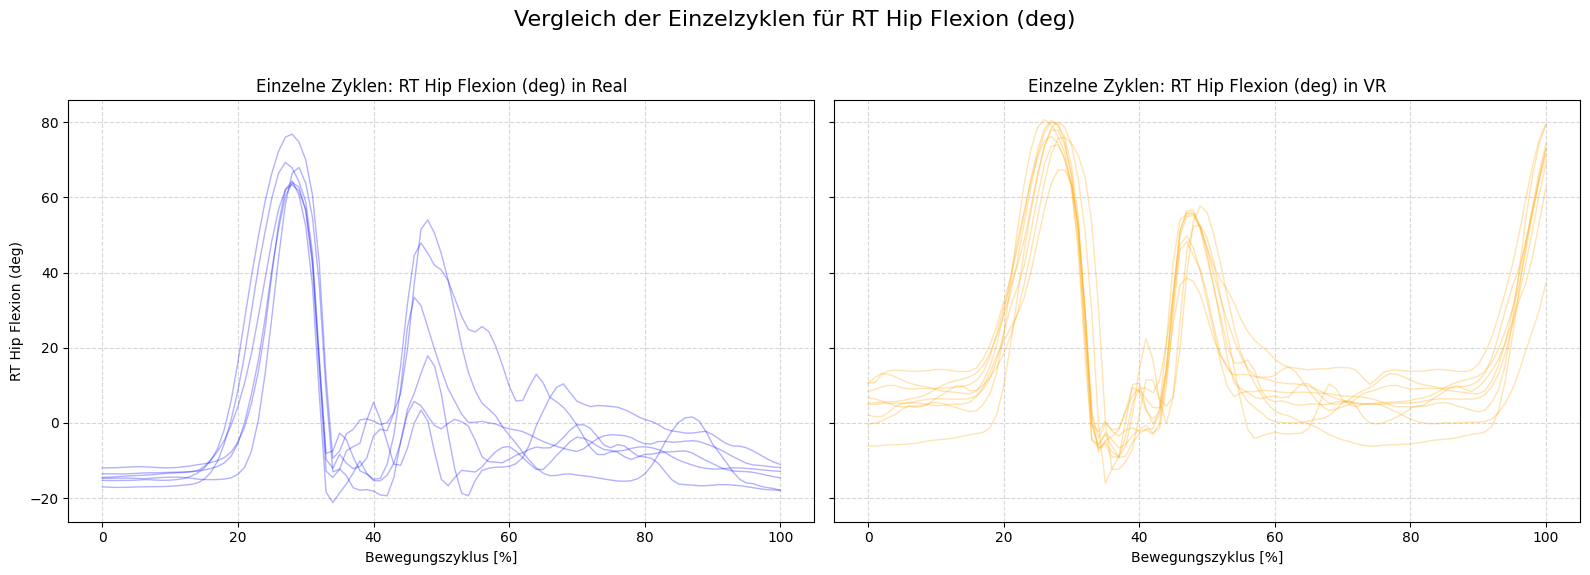

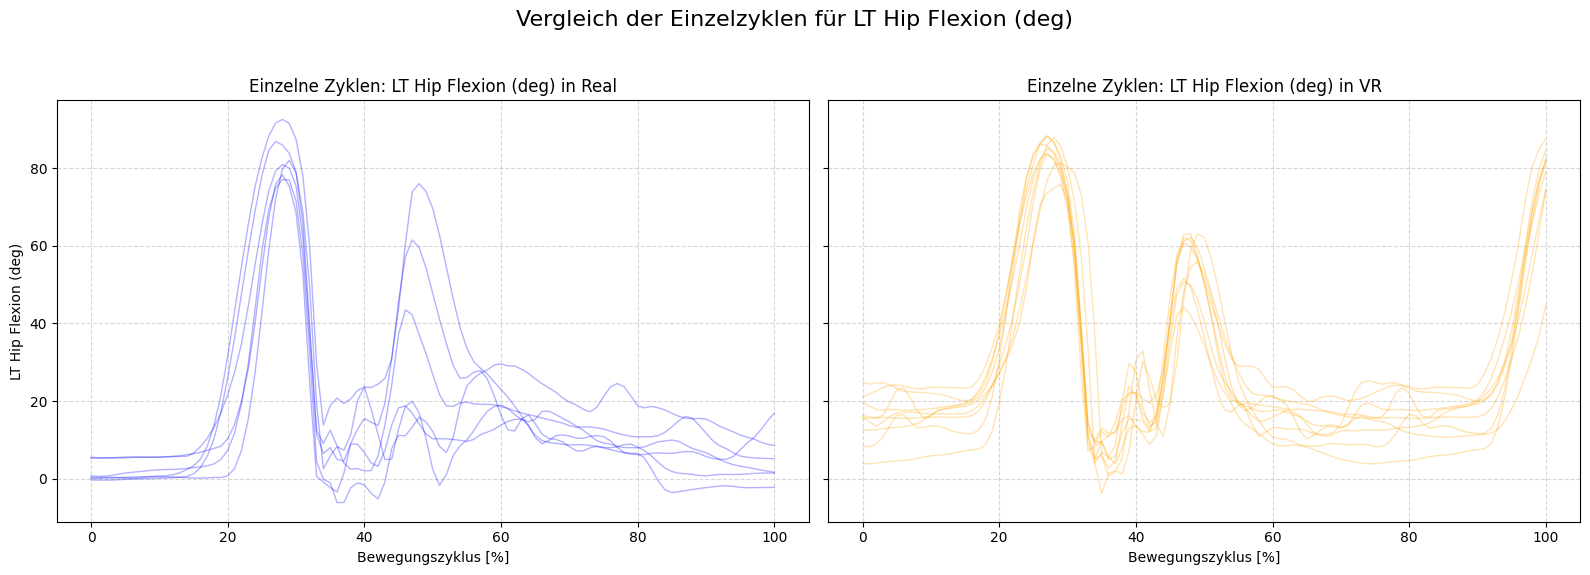

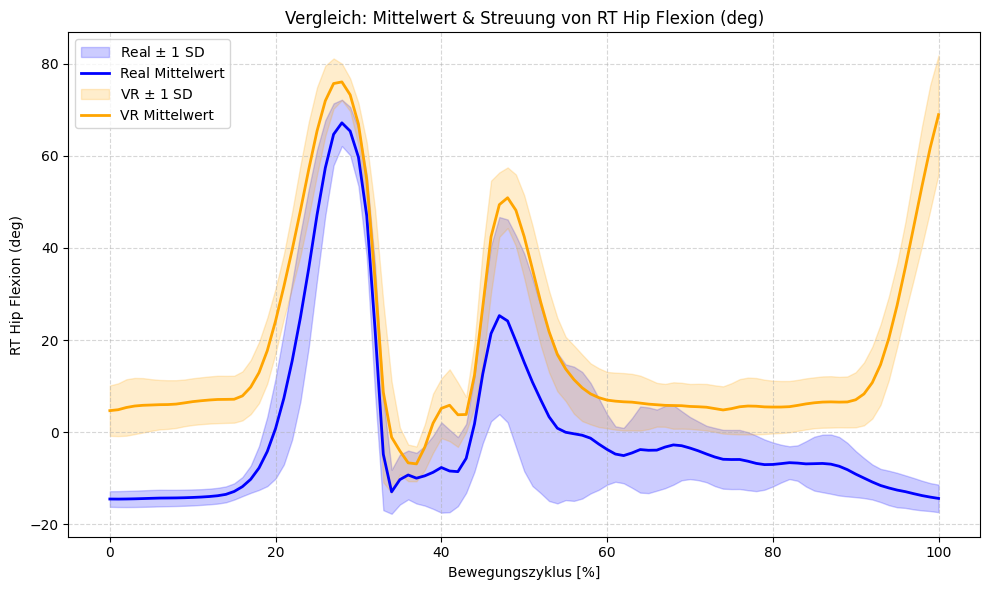

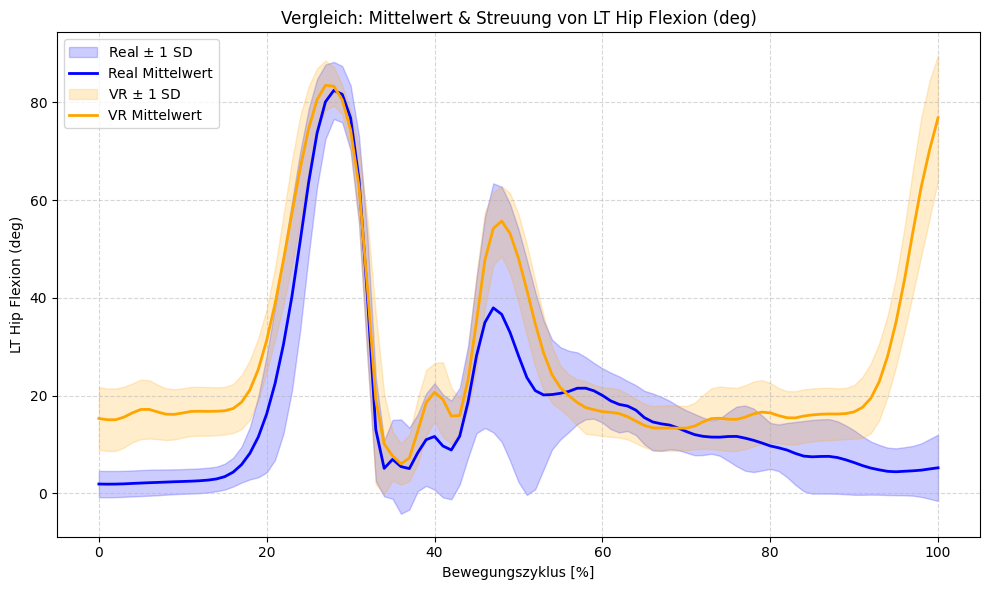

In [9]:
# 1. Normalisierung der Zyklen für beide Bedingungen (muss zuerst laufen!)
# Rechts Knie Flexion
real3_kin_cycles_right = normalize_kinematics_cycles(data_real3, cycles, "Real 3", "RT Hip Flexion (deg)")
vr2_kin_cycles_right = normalize_kinematics_cycles(data_vr2, cycles, "VR 2", "RT Hip Flexion (deg)")
# Links Knie Flexion
real3_kin_cycles_left = normalize_kinematics_cycles(data_real3, cycles, "Real 3", "LT Hip Flexion (deg)")
vr2_kin_cycles_left = normalize_kinematics_cycles(data_vr2, cycles, "VR 2", "LT Hip Flexion (deg)")

# 2. Visualisierung: Einzelne Zyklen nebeneinander (Der gewünschte Plot)
# print("\n--- Plotting Einzelzyklen Vergleich ---")
# HINWEIS: Hier müssen die Variablen real3_kin_cycles und vr2_kin_cycles
# aus dem Normalisierungsschritt gefüllt sein.
plot_all_cycles_comparison(real3_kin_cycles_right, vr2_kin_cycles_right, "RT Hip Flexion (deg)")
plot_all_cycles_comparison(real3_kin_cycles_left, vr2_kin_cycles_left, "LT Hip Flexion (deg)")


# 3. Visualisierung: Mittelwert & SD im Vergleich (Der gewünschte Plot)
# print("\n--- Plotting Mittelwert & SD Vergleich ---")
# HINWEIS: Hier müssen die Variablen real3_kin_cycles und vr2_kin_cycles
# aus dem Normalisierungsschritt gefüllt sein.
plot_mean_std_comparison(real3_kin_cycles_right, vr2_kin_cycles_right, "RT Hip Flexion (deg)")
plot_mean_std_comparison(real3_kin_cycles_left, vr2_kin_cycles_left, "LT Hip Flexion (deg)")